# SENTIMENT ANALYSIS IN CARDIO MEDICATION PREDICTION  USING NLP

##### Import The Data


In [3]:
import pandas as pd
from pandas import read_csv
ds=read_csv(r"E:\Project\Cardio.csv")
df=pd.DataFrame(ds)
df.head()

,Patient_ID,Age,Gender,Heart_Rate,BP_Systolic,BP_Diastolic,Cholesterol_Level,Doctor_Feedback,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Sentiment_Analysis
0,1001,43,Male,116,145,69,186,"Cholesterol levels high, recommend lifestyle c...",NaN,NaN,NaN,NaN,NaN,Requires Careful Observation
1,1002,76,Female,86,160,82,185,"Patient in good health, maintain diet and exer...",NaN,NaN,NaN,NaN,NaN,No Medication Required
2,1003,60,Male,112,136,78,256,Patient is recovering well with no complications.,NaN,NaN,NaN,NaN,NaN,No Medication Required
3,1004,61,Male,115,168,89,265,"Severe chest pain reported, possible cardiac a...",NaN,NaN,NaN,NaN,NaN,Medication Required
4,1005,65,Male,61,120,101,243,Patient's condition is stable; monitor regularly.,NaN,NaN,NaN,NaN,NaN,Requires Careful Observation


##### Remove The Unnamed Columns


In [6]:
# Remove unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Display the cleaned DataFrame
print(df.head())




   Patient_ID  Age  Gender  Heart_Rate  BP_Systolic  BP_Diastolic  \
0        1001   43    Male         116          145            69   
1        1002   76  Female          86          160            82   
2        1003   60    Male         112          136            78   
3        1004   61    Male         115          168            89   
4        1005   65    Male          61          120           101   

   Cholesterol_Level                                    Doctor_Feedback  \
0                186  Cholesterol levels high, recommend lifestyle c...   
1                185  Patient in good health, maintain diet and exer...   
2                256  Patient is recovering well with no complications.   
3                265  Severe chest pain reported, possible cardiac a...   
4                243  Patient's condition is stable; monitor regularly.   

             Sentiment_Analysis  
0  Requires Careful Observation  
1        No Medication Required  
2        No Medication Required 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Patient_ID          250 non-null    int64 
 1   Age                 250 non-null    int64 
 2   Gender              250 non-null    object
 3   Heart_Rate          250 non-null    int64 
 4   BP_Systolic         250 non-null    int64 
 5   BP_Diastolic        250 non-null    int64 
 6   Cholesterol_Level   250 non-null    int64 
 7   Doctor_Feedback     250 non-null    object
 8   Sentiment_Analysis  250 non-null    object
dtypes: int64(6), object(3)
memory usage: 17.7+ KB


In [10]:
df.head(12)

,Patient_ID,Age,Gender,Heart_Rate,BP_Systolic,BP_Diastolic,Cholesterol_Level,Doctor_Feedback,Sentiment_Analysis
0,1001,43,Male,116,145,69,186,"Cholesterol levels high, recommend lifestyle c...",Requires Careful Observation
1,1002,76,Female,86,160,82,185,"Patient in good health, maintain diet and exer...",No Medication Required
2,1003,60,Male,112,136,78,256,Patient is recovering well with no complications.,No Medication Required
3,1004,61,Male,115,168,89,265,"Severe chest pain reported, possible cardiac a...",Medication Required
4,1005,65,Male,61,120,101,243,Patient's condition is stable; monitor regularly.,Requires Careful Observation
5,1006,32,Male,97,124,60,266,No significant changes observed; maintain curr...,Requires Careful Observation
6,1007,65,Female,73,156,117,242,"Severe chest pain reported, possible cardiac a...",Medication Required
7,1008,53,Male,88,154,63,277,Routine check-up completed; no immediate concerns,Requires Careful Observation
8,1009,77,Female,118,136,115,262,Treatment effective; patient shows significant...,No Medication Required
9,1010,47,Male,104,126,112,278,"Severe chest pain reported, possible cardiac a...",Medication Required


In [12]:
print(df['Sentiment_Analysis'].head())

0    Requires Careful Observation
1          No Medication Required
2          No Medication Required
3             Medication Required
4    Requires Careful Observation
Name: Sentiment_Analysis, dtype: object


##### Preprocessing The Dataset

In [15]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

df['Cleaned_Text'] = df['Doctor_Feedback'].apply(clean_text)
print(df[['Doctor_Feedback', 'Cleaned_Text']].head())


                                     Doctor_Feedback  \
0  Cholesterol levels high, recommend lifestyle c...   
1  Patient in good health, maintain diet and exer...   
2  Patient is recovering well with no complications.   
3  Severe chest pain reported, possible cardiac a...   
4  Patient's condition is stable; monitor regularly.   

                                        Cleaned_Text  
0  cholesterol levels high recommend lifestyle ch...  
1         patient good health maintain diet exercise  
2              patient recovering well complications  
3  severe chest pain reported possible cardiac ar...  
4        patients condition stable monitor regularly  


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kings\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##### After the Preprocessing

In [17]:
df.head(10)

,Patient_ID,Age,Gender,Heart_Rate,BP_Systolic,BP_Diastolic,Cholesterol_Level,Doctor_Feedback,Sentiment_Analysis,Cleaned_Text
0,1001,43,Male,116,145,69,186,"Cholesterol levels high, recommend lifestyle c...",Requires Careful Observation,cholesterol levels high recommend lifestyle ch...
1,1002,76,Female,86,160,82,185,"Patient in good health, maintain diet and exer...",No Medication Required,patient good health maintain diet exercise
2,1003,60,Male,112,136,78,256,Patient is recovering well with no complications.,No Medication Required,patient recovering well complications
3,1004,61,Male,115,168,89,265,"Severe chest pain reported, possible cardiac a...",Medication Required,severe chest pain reported possible cardiac ar...
4,1005,65,Male,61,120,101,243,Patient's condition is stable; monitor regularly.,Requires Careful Observation,patients condition stable monitor regularly
5,1006,32,Male,97,124,60,266,No significant changes observed; maintain curr...,Requires Careful Observation,significant changes observed maintain current ...
6,1007,65,Female,73,156,117,242,"Severe chest pain reported, possible cardiac a...",Medication Required,severe chest pain reported possible cardiac ar...
7,1008,53,Male,88,154,63,277,Routine check-up completed; no immediate concerns,Requires Careful Observation,routine checkup completed immediate concerns
8,1009,77,Female,118,136,115,262,Treatment effective; patient shows significant...,No Medication Required,treatment effective patient shows significant ...
9,1010,47,Male,104,126,112,278,"Severe chest pain reported, possible cardiac a...",Medication Required,severe chest pain reported possible cardiac ar...


##### Import Textblob Library

In [19]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "No Medication Required"
    elif analysis.sentiment.polarity < 0:
        return "Medication Required" 
    else:
        return "Requires Careful Observation"

df['Sentiment'] = df['Cleaned_Text'].apply(get_sentiment)
print(df[['Cleaned_Text', 'Sentiment']].head(20))

                                         Cleaned_Text  \
0   cholesterol levels high recommend lifestyle ch...   
1          patient good health maintain diet exercise   
2               patient recovering well complications   
3   severe chest pain reported possible cardiac ar...   
4         patients condition stable monitor regularly   
5   significant changes observed maintain current ...   
6   severe chest pain reported possible cardiac ar...   
7        routine checkup completed immediate concerns   
8   treatment effective patient shows significant ...   
9   severe chest pain reported possible cardiac ar...   
10          vitals stable continue current medication   
11        patients condition stable monitor regularly   
12  severe chest pain reported possible cardiac ar...   
13  significant changes observed maintain current ...   
14         patient good health maintain diet exercise   
15  cholesterol levels high recommend lifestyle ch...   
16              patient recover

##### Cout Of Analysis Records

In [21]:
total_records = df['Sentiment'].count()
sentiment_counts = df['Sentiment'].value_counts()
print("Total number of sentiment records:", total_records)
print(sentiment_counts)

Total number of sentiment records: 250
Sentiment
No Medication Required          94
Requires Careful Observation    83
Medication Required             73
Name: count, dtype: int64


#### Import The Matplotlib 

##### In The Barchart

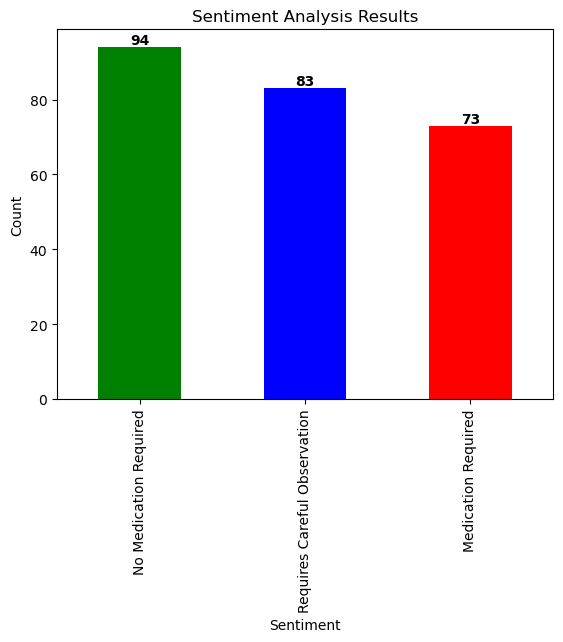

In [24]:
import matplotlib.pyplot as plt

# Create bar plot
ax = df['Sentiment'].value_counts().plot(kind='bar', color=['green', 'blue', 'red'])

# Add labels on top of each bar
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
            str(int(bar.get_height())), ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Labels and title
plt.title("Sentiment Analysis Results")
plt.xlabel("Sentiment")
plt.ylabel("Count")

# Show plot
plt.show()

##### Display The Precentage In Piechart

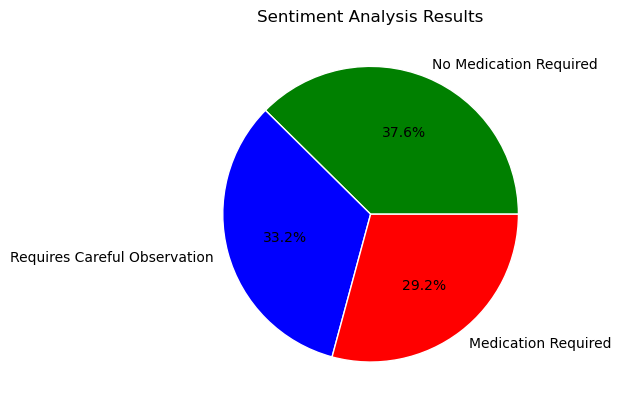

In [26]:
import matplotlib.pyplot as plt
df['Sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%',colors=['green', 'blue', 'red'],wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title("Sentiment Analysis Results")
plt.ylabel('')  
plt.show()

##### To Install Vader Library 

In [28]:
!pip install vaderSentiment


##### Import Vader Library

In [30]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return "No Medication Required"
    elif score['compound'] == 0.0:
        return "Requires Careful Observation"
    else:
        return "Medication Required"

df['Sentiment_VADER'] = df['Cleaned_Text'].apply(vader_sentiment)
print(df[['Cleaned_Text', 'Sentiment_VADER']].head(20))

                                         Cleaned_Text  \
0   cholesterol levels high recommend lifestyle ch...   
1          patient good health maintain diet exercise   
2               patient recovering well complications   
3   severe chest pain reported possible cardiac ar...   
4         patients condition stable monitor regularly   
5   significant changes observed maintain current ...   
6   severe chest pain reported possible cardiac ar...   
7        routine checkup completed immediate concerns   
8   treatment effective patient shows significant ...   
9   severe chest pain reported possible cardiac ar...   
10          vitals stable continue current medication   
11        patients condition stable monitor regularly   
12  severe chest pain reported possible cardiac ar...   
13  significant changes observed maintain current ...   
14         patient good health maintain diet exercise   
15  cholesterol levels high recommend lifestyle ch...   
16              patient recover

##### Cout Of Analysis Records

In [32]:
total_records = df['Sentiment_VADER'].count()
sentiment_counts_va = df['Sentiment_VADER'].value_counts()
print("Total number of sentiment records:", total_records)
print(sentiment_counts_va)

Total number of sentiment records: 250
Sentiment_VADER
No Medication Required          157
Medication Required              73
Requires Careful Observation     20
Name: count, dtype: int64


#### Import The Matplotlib 

##### In The Barchart

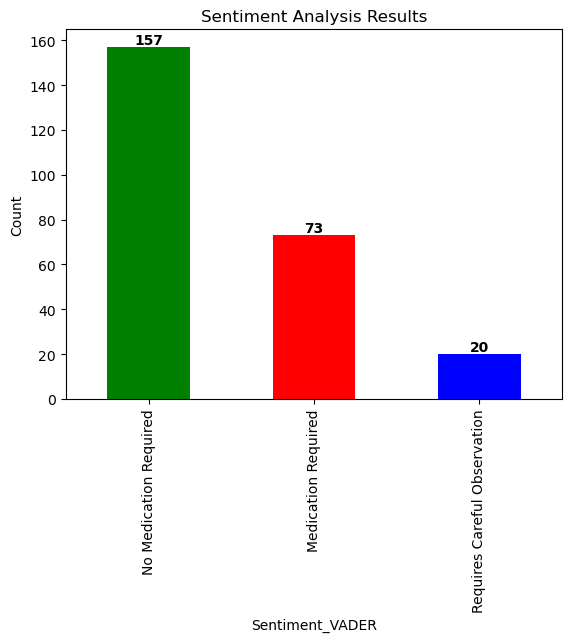

In [35]:
import matplotlib.pyplot as plt

# Create bar plot
ax = df['Sentiment_VADER'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])

# Add labels on top of each bar
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
            str(int(bar.get_height())), ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Labels and title
plt.title("Sentiment Analysis Results")
plt.xlabel("Sentiment_VADER")
plt.ylabel("Count")

# Show plot
plt.show()


##### Display The Precentage In Piechart

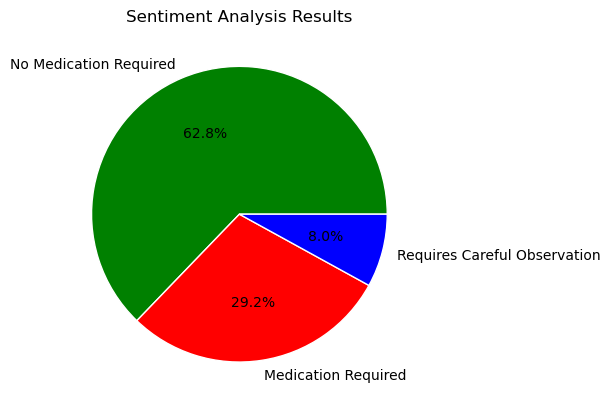

In [37]:
import matplotlib.pyplot as plt
df['Sentiment_VADER'].value_counts().plot(kind='pie',autopct='%1.1f%%', colors=['green', 'red', 'blue'],wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title("Sentiment Analysis Results")
plt.ylabel('')  
plt.show()

##### Install Wordcloud Library

In [41]:
!pip install wordcloud


##### Import Wordcloud Library

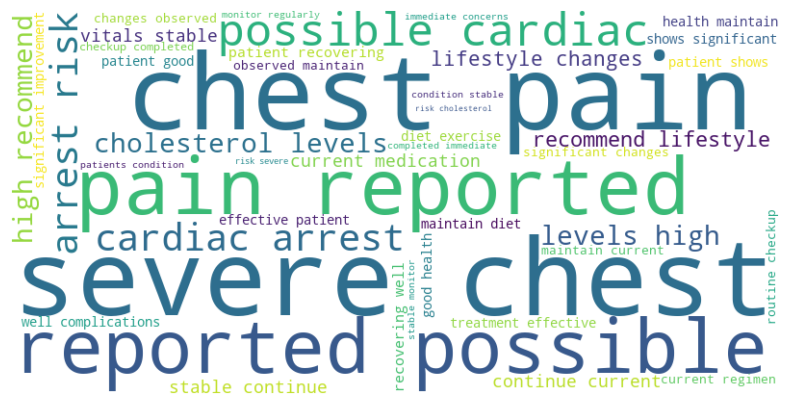

In [45]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Cleaned_Text']))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



#### Compare Processing Time Between TextBlob & VADER

In [47]:
import time
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load dataset (assuming df contains 'Text' column)
analyzer = SentimentIntensityAnalyzer()
# Measure TextBlob Time
start_time = time.time()
df['TextBlob_Sentiment'] = df['Cleaned_Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
textblob_time = time.time() - start_time

# Measure VADER Time
start_time = time.time()
df['VADER_Sentiment'] = df['Cleaned_Text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
vader_time = time.time() - start_time

# Print Results
print(f"TextBlob Processing Time: {textblob_time:.2f} seconds")
print(f"VADER Processing Time: {vader_time:.2f} seconds")


TextBlob Processing Time: 0.05 seconds
VADER Processing Time: 0.01 seconds


##### To The Display In The Barchart

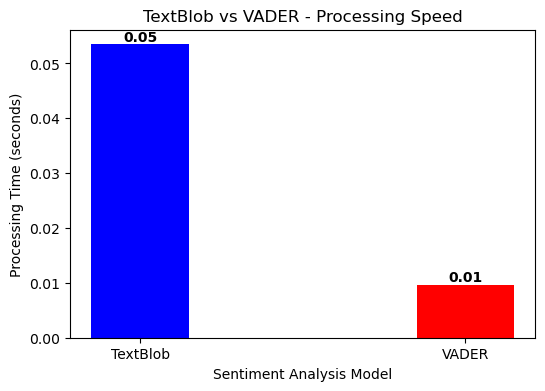

In [49]:
import matplotlib.pyplot as plt

# Example Data for visualization
models = ['TextBlob', 'VADER']
times = [textblob_time, vader_time]

# Bar Chart
plt.figure(figsize=(6, 4))
bars = plt.bar(models, times, color=['blue', 'red'], width=0.3)  # Adjust width

# Add labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f"{bar.get_height():.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Labels and Title
plt.xlabel("Sentiment Analysis Model")
plt.ylabel("Processing Time (seconds)")
plt.title("TextBlob vs VADER - Processing Speed")

plt.show()


#####  Compare Accuracy Textblob VS Vader

In [51]:

import pandas as pd
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, classification_report

actual = df['Sentiment_Analysis']
textblob_pred =df['Sentiment']
vader_pred = df['Sentiment_VADER']


# Accuracy Calculation
textblob_accuracy = accuracy_score( df['Sentiment_Analysis'], df['Sentiment'])
vader_accuracy = accuracy_score( df['Sentiment_Analysis'],df['Sentiment_VADER'])

# Print Accuracy
print(f"TextBlob Accuracy: {textblob_accuracy:.2f}")
print(f"VADER Accuracy: {vader_accuracy:.2f}")

# Detailed Classification Report
print("\nTextBlob Performance:")
print(classification_report( df['Sentiment_Analysis'], df['Sentiment']))

print("\nVADER Performance:")
print(classification_report( df['Sentiment_Analysis'], df['Sentiment_VADER']))

TextBlob Accuracy: 0.61
VADER Accuracy: 0.71

TextBlob Performance:
                              precision    recall  f1-score   support

         Medication Required       1.00      1.00      1.00        73
      No Medication Required       0.44      0.48      0.46        85
Requires Careful Observation       0.47      0.42      0.45        92

                    accuracy                           0.61       250
                   macro avg       0.64      0.64      0.63       250
                weighted avg       0.61      0.61      0.61       250


VADER Performance:
                              precision    recall  f1-score   support

         Medication Required       1.00      1.00      1.00        73
      No Medication Required       0.54      1.00      0.70        85
Requires Careful Observation       1.00      0.22      0.36        92

                    accuracy                           0.71       250
                   macro avg       0.85      0.74      0.69       2

##### Display In Barchart Textblob VS Vader

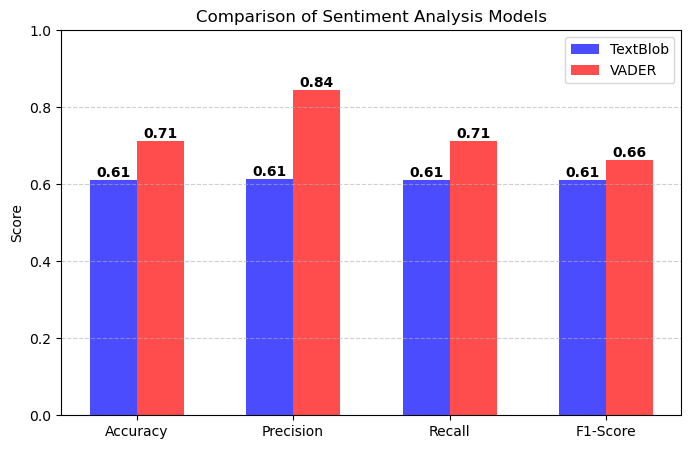

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Example: Actual vs Predicted Sentiments (Replace with real predictions)
actual = df['Sentiment_Analysis']
textblob_pred = df['Sentiment']
vader_pred = df['Sentiment_VADER']

# Calculate Metrics for TextBlob
textblob_accuracy = accuracy_score(actual, textblob_pred)
textblob_precision = precision_score(actual, textblob_pred, average='weighted')
textblob_recall = recall_score(actual, textblob_pred, average='weighted')
textblob_f1 = f1_score(actual, textblob_pred, average='weighted')

# Calculate Metrics for VADER
vader_accuracy = accuracy_score(actual, vader_pred)
vader_precision = precision_score(actual, vader_pred, average='weighted')
vader_recall = recall_score(actual, vader_pred, average='weighted')
vader_f1 = f1_score(actual, vader_pred, average='weighted')

# Data for visualization
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
textblob_scores = [textblob_accuracy, textblob_precision, textblob_recall, textblob_f1]
vader_scores = [vader_accuracy, vader_precision, vader_recall, vader_f1]

# Bar chart settings
bar_width = 0.3
x = np.arange(len(metrics))

fig, ax = plt.subplots(figsize=(8, 5))

# Plot bars
bars_textblob = ax.bar(x, textblob_scores, width=bar_width, label="TextBlob", color='blue', alpha=0.7)
bars_vader = ax.bar(x + bar_width, vader_scores, width=bar_width, label="VADER", color='red', alpha=0.7)

# Add number labels on top of bars
for bar in bars_textblob:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2f}',
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

for bar in bars_vader:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2f}',
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Labels and Title
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(metrics)
plt.title("Comparison of Sentiment Analysis Models")
plt.ylabel("Score")
plt.ylim(0, 1)  # Scores range between 0-1
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show Plot
plt.show()



##### Compare The Sentiment Analysis Textblob VS Vader 

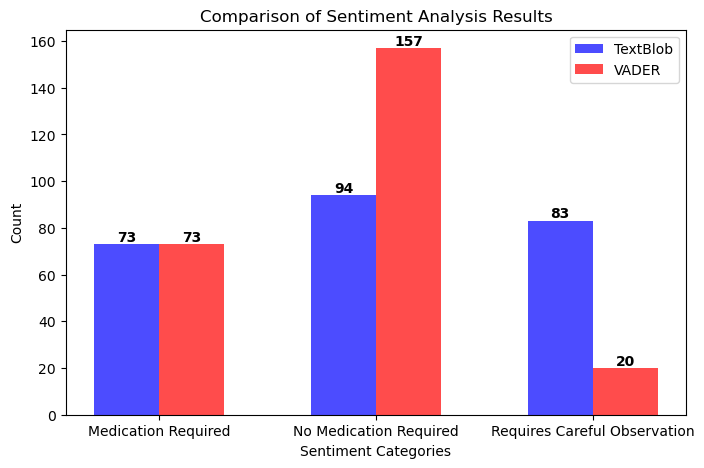

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

# Example Data
df = pd.DataFrame({ 
    'Sentiment_analysis': ['Medication Required', 'No Medication Required', 'Requires Careful Observation'],
    'TextBlob': [df['Sentiment'].value_counts().get('Medication Required', 0),
                 df['Sentiment'].value_counts().get('No Medication Required', 0),
                 df['Sentiment'].value_counts().get('Requires Careful Observation', 0)],
    'VADER': [df['Sentiment_VADER'].value_counts().get('Medication Required', 0),
              df['Sentiment_VADER'].value_counts().get('No Medication Required', 0),
              df['Sentiment_VADER'].value_counts().get('Requires Careful Observation', 0)]
})

# Plot bar chart
fig, ax = plt.subplots(figsize=(8, 5))

# Bar width
bar_width = 0.3

# X-axis positions
x = range(len(df['Sentiment_analysis']))

# Plot TextBlob results
bars_textblob = ax.bar(x, df['TextBlob'], width=bar_width, label="TextBlob", color='blue', alpha=0.7)

# Plot VADER results (shift bars to right)
bars_vader = ax.bar([i + bar_width for i in x], df['VADER'], width=bar_width, label="VADER", color='red', alpha=0.7)

# Add number labels on top of bars
for bar in bars_textblob:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(int(bar.get_height())),
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

for bar in bars_vader:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(int(bar.get_height())),
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Labeling
ax.set_xticks([i + bar_width / 2 for i in x])  # Center labels
ax.set_xticklabels(df['Sentiment_analysis'])
plt.title("Comparison of Sentiment Analysis Results")
plt.xlabel("Sentiment Categories")
plt.ylabel("Count")
plt.legend()
plt.show()
